In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_theme(style='darkgrid')

In [3]:
df = pd.read_csv('stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* BMI feature has a lot of missing values

In [7]:
num_cols = df.columns[df.dtypes != object]
num_cols

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [8]:
categ_cols = df.columns[df.dtypes == object]
categ_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [9]:
def histplot_num_cols():
    dataset = df.copy()
    fig, axes = plt.subplots(len(num_cols), figsize=(5, 30))
    row_idx = 0
    for col in num_cols:
        sns.histplot(x=col, data=dataset, ax = axes[row_idx])
        row_idx += 1
    plt.show()

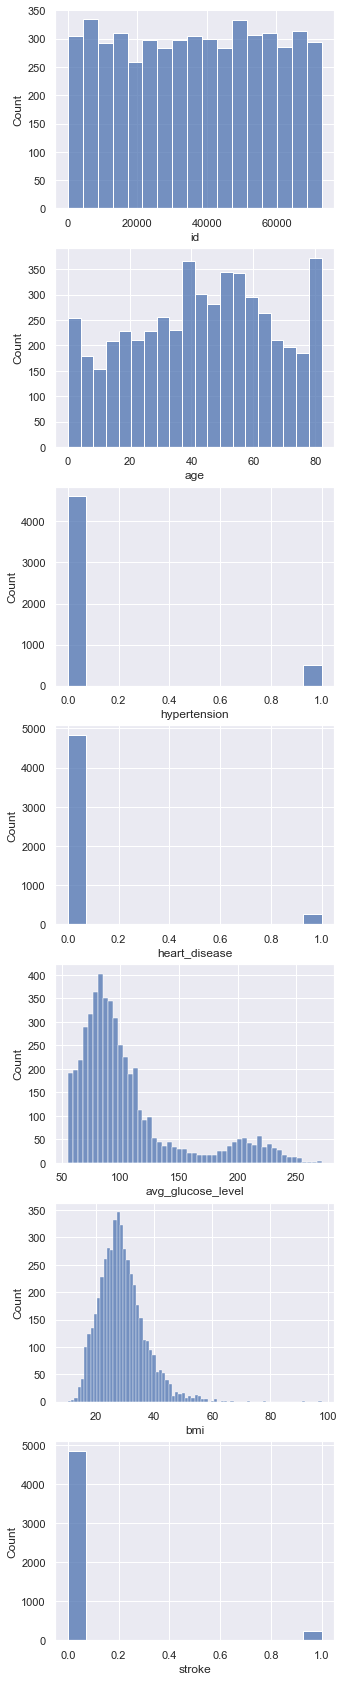

In [10]:
histplot_num_cols()

In [11]:
df.groupby('hypertension').count()

,id,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
hypertension,,,,,,,,,,,
0,4612,4612,4612,4612,4612,4612,4612,4612,4458,4612,4612
1,498,498,498,498,498,498,498,498,451,498,498


In [12]:
df.groupby('hypertension')['hypertension'].count()

hypertension
0    4612
1     498
Name: hypertension, dtype: int64

In [13]:
df.groupby('hypertension')['hypertension'].count().apply(lambda x: x*100/ len(df))


hypertension
0    90.254403
1     9.745597
Name: hypertension, dtype: float64

In [14]:
df.groupby('hypertension')['id'].agg({'count'}).reset_index()


,hypertension,count
0,0,4612
1,1,498


In [15]:
grouped_data = df.groupby('hypertension')['id'].agg({'count'}).reset_index()
grouped_data

,hypertension,count
0,0,4612
1,1,498


<AxesSubplot:xlabel='hypertension', ylabel='count'>

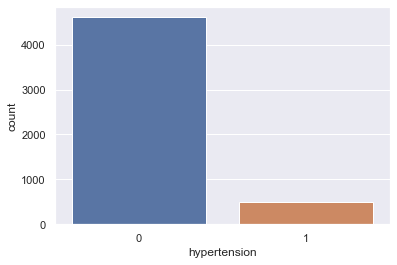

In [16]:
sns.barplot(x='hypertension', y='count', data=grouped_data)

### Converting these steps into a common function

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
df_copy = df.copy()

In [19]:
def plot_grouped_data(feature):
    dataset = df.copy()
    grouped_dataset  = dataset.groupby(feature)['id'].agg({'count'}).apply(lambda x: x* 100/len(dataset)).reset_index()
    grouped_dataset_plot = dataset.groupby(feature)['id'].agg({'count'}).reset_index()
    sns.barplot(y='count', x=feature, data=grouped_dataset_plot)
    return grouped_dataset
    plt.show()


,hypertension,count
0,0,90.254403
1,1,9.745597


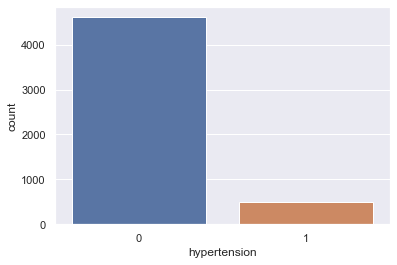

In [20]:
plot_grouped_data('hypertension')

* **90% of population do not have heart disease.**

,heart_disease,count
0,0,94.598826
1,1,5.401174


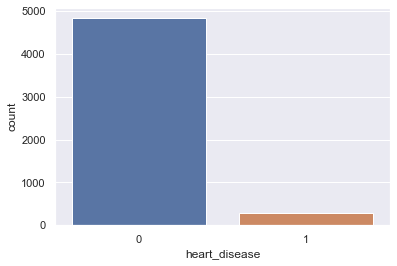

In [21]:
plot_grouped_data('heart_disease')

* **94% of population do not have heart disease.**

,ever_married,count
0,No,34.383562
1,Yes,65.616438


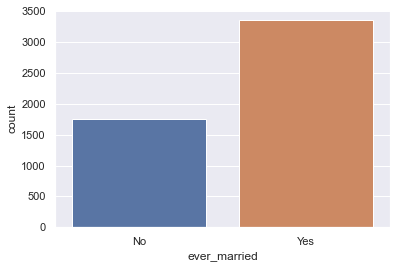

In [22]:
plot_grouped_data('ever_married')

,work_type,count
0,Govt_job,12.857143
1,Never_worked,0.430528
2,Private,57.240705
3,Self-employed,16.027397
4,children,13.444227


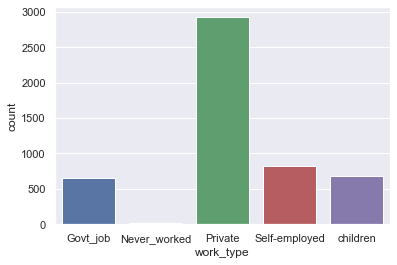

In [23]:
plot_grouped_data('work_type')

,Residence_type,count
0,Rural,49.197652
1,Urban,50.802348


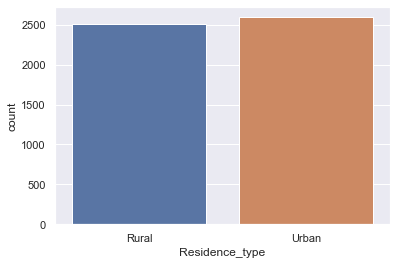

In [24]:
plot_grouped_data('Residence_type')

### Common Function for creating Countplot for all the categorical features

In [25]:
def countplot_categ_cols():
    dataset = df.copy()
    fig, axes = plt.subplots(len(categ_cols), figsize=(5, 30))
    row_idx = 0
    for col in categ_cols:
        sns.countplot(x=col, data=dataset, ax = axes[row_idx])
        row_idx += 1
    plt.show()

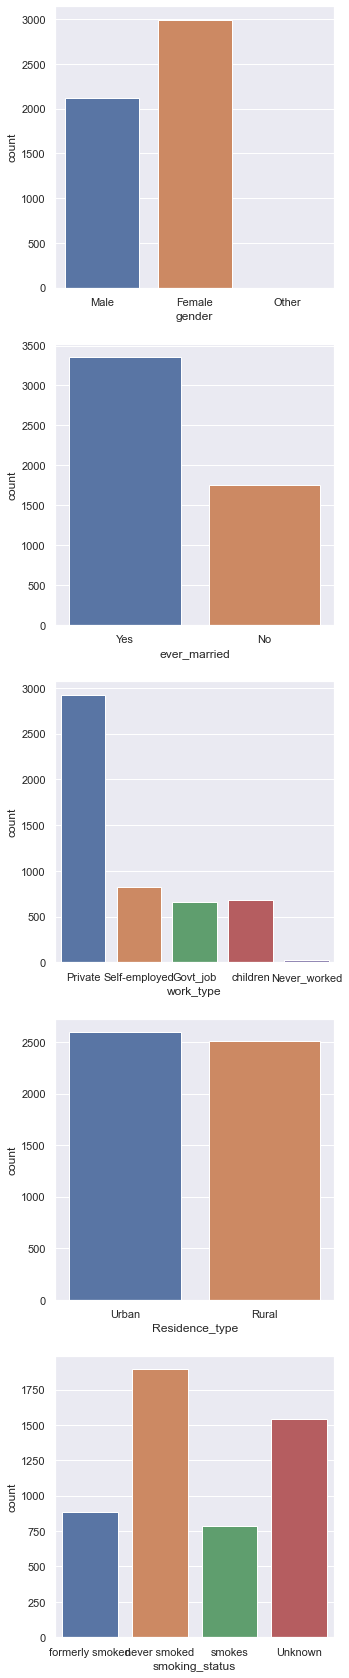

In [26]:
countplot_categ_cols()

## Bivariavte Analysis

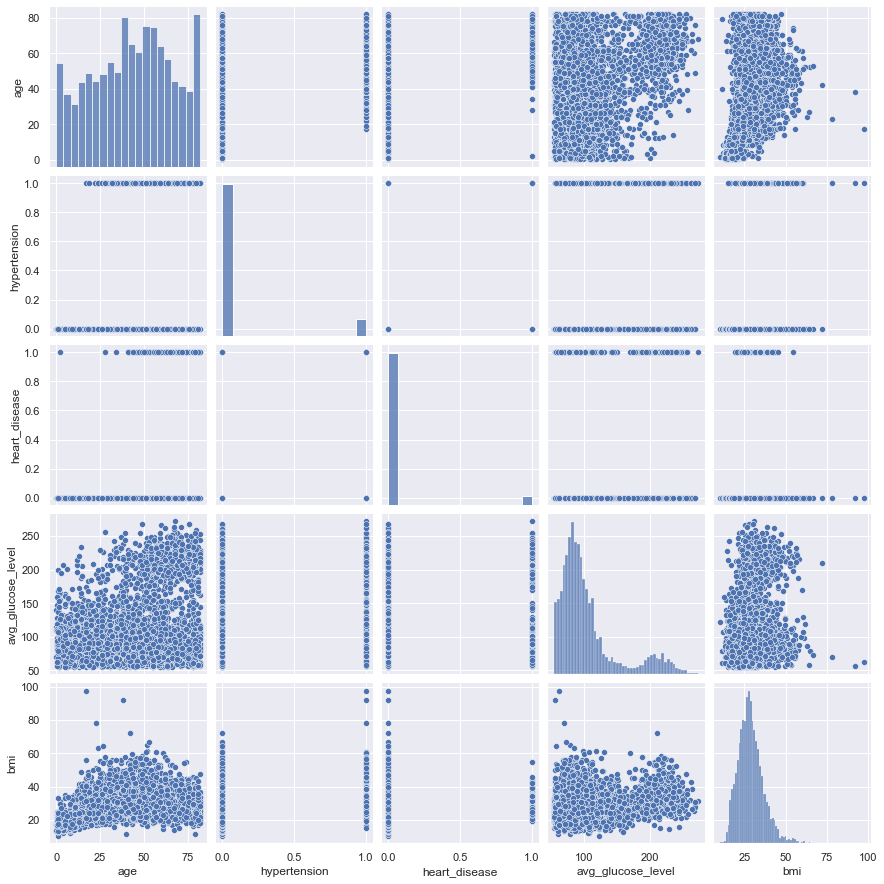

In [27]:
sns.pairplot(df.iloc[:, 1:-1])

<AxesSubplot:xlabel='age', ylabel='Count'>

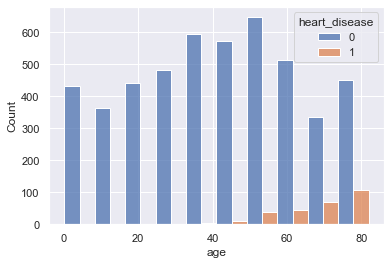

In [28]:
sns.histplot(x='age', data=df, bins=10, hue='heart_disease', multiple='dodge')


<AxesSubplot:xlabel='age', ylabel='Count'>

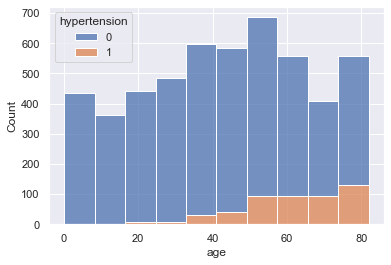

In [29]:
sns.histplot(x='age', data=df, bins=10, hue='hypertension', multiple='stack')


<AxesSubplot:xlabel='age', ylabel='Count'>

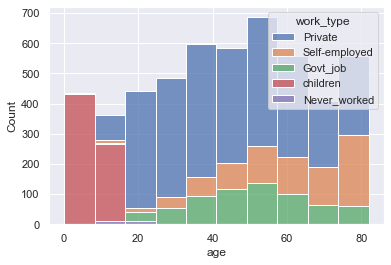

In [30]:
sns.histplot(x='age', data=df, bins=10, hue='work_type', 
             multiple='stack')

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

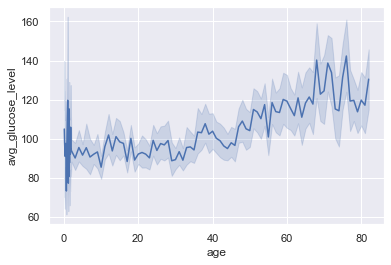

In [31]:
sns.lineplot(x='age', data=df, y='avg_glucose_level')

In [32]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot:xlabel='age', ylabel='bmi'>

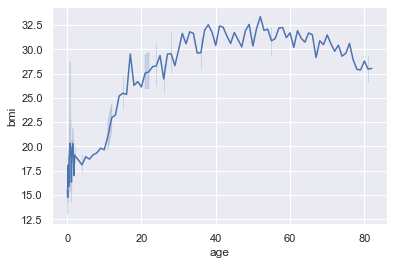

In [33]:
sns.lineplot(x='age', data=df, y='bmi')

* According to the data, BMI starts to decline after the age of 50.

<AxesSubplot:xlabel='age', ylabel='bmi'>

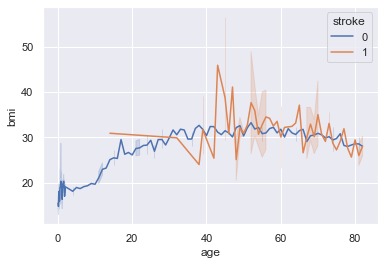

In [34]:
sns.lineplot(x='age', data=df, y='bmi', hue='stroke')

## Relation between age and categorical columns

In [35]:
def rel_age_categ():
    dataset = df.copy()
    fig, axes = plt.subplots(len(categ_cols), figsize=(10,30))
    for idx, col in enumerate(categ_cols):
        #print(idx)
        sns.histplot(x='age', hue=col, data=dataset, bins=10, 
                     multiple='stack', ax=axes[idx])
    plt.show()


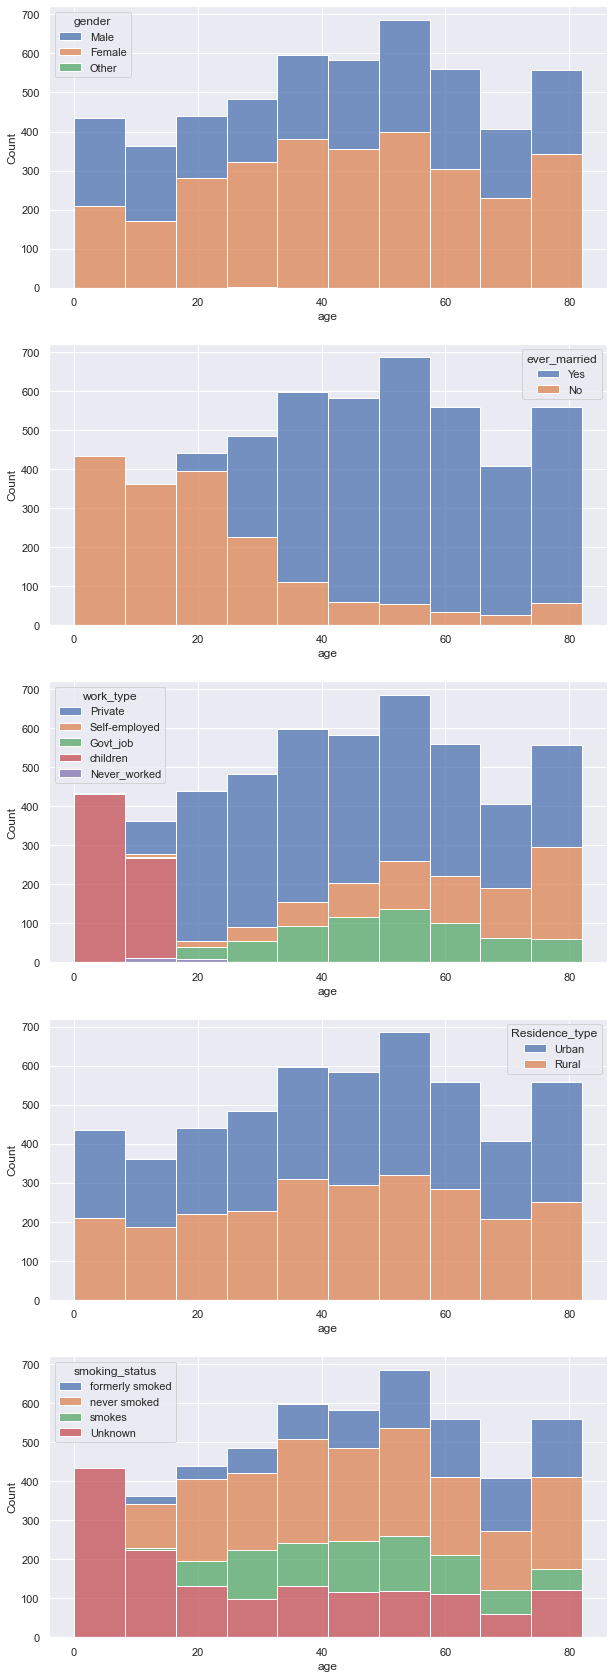

In [36]:
rel_age_categ()

## Function to check the cause of Stroke

In [37]:
df_copy = df.copy()
grouped_df = df_copy.groupby(['hypertension', 'stroke'])['id'].agg({'count'}).reset_index()
grouped_df['Percentage Count'] = grouped_df.groupby('hypertension')['count'].apply(lambda x: 100 *x / x.sum())
#grouped_df.groupby('hypertension').sum()
grouped_df


,hypertension,stroke,count,Percentage Count
0,0,0,4429,96.032090
1,0,1,183,3.967910
2,1,0,432,86.746988
3,1,1,66,13.253012


In [38]:
(100*4429)/(4429+183)

96.03209019947961

In [39]:
(100*183)/(4429+183)

3.9679098005203817

In [40]:
4429+183

4612

#### Common Function to check the cause of Stroke

In [41]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:
def cause_of_stroke(feature):
    dataset = df.copy()
    grouped_data = dataset.groupby([feature, 'stroke'])['id'].agg({'count'}).reset_index()
    grouped_data['Percentage Count'] = grouped_data.groupby(feature)['count'].apply(lambda x: 100 *x / x.sum())
    return grouped_data

In [43]:
cause_of_stroke('hypertension')

,hypertension,stroke,count,Percentage Count
0,0,0,4429,96.032090
1,0,1,183,3.967910
2,1,0,432,86.746988
3,1,1,66,13.253012


Observations:

* People having hypertension have higher chance of stroke.

In [44]:
cause_of_stroke('heart_disease')

,heart_disease,stroke,count,Percentage Count
0,0,0,4632,95.821266
1,0,1,202,4.178734
2,1,0,229,82.971014
3,1,1,47,17.028986


Observatons:

* People with heart disease have higher chances of stroke

In [45]:
cause_of_stroke('ever_married')

,ever_married,stroke,count,Percentage Count
0,No,0,1728,98.349459
1,No,1,29,1.650541
2,Yes,0,3133,93.438712
3,Yes,1,220,6.561288


Observations:

* Married people have higher chances of getting stroke.

In [46]:
cause_of_stroke('work_type')

,work_type,stroke,count,Percentage Count
0,Govt_job,0,624,94.977169
1,Govt_job,1,33,5.022831
2,Never_worked,0,22,100.000000
3,Private,0,2776,94.905983
4,Private,1,149,5.094017
5,Self-employed,0,754,92.063492
6,Self-employed,1,65,7.936508
7,children,0,685,99.708879
8,children,1,2,0.291121


Observations:

* Self-Employed people have a higher chance of stroke
* No data regarding people getting stroke who have never worked
* Children have the least possibility of getting stroke
* Among Private and Government job people, a very small amount of difference can be seen in th percentage of people getting stroke.However, Private job people percentage dominate when compared to government job people percentage. 


In [47]:
cause_of_stroke('Residence_type')

,Residence_type,stroke,count,Percentage Count
0,Rural,0,2400,95.465394
1,Rural,1,114,4.534606
2,Urban,0,2461,94.799692
3,Urban,1,135,5.200308


Observations:

* People living in urban areas have higher chances of stroke as compared to people residing in rural areas.

In [48]:
cause_of_stroke('smoking_status')

,smoking_status,stroke,count,Percentage Count
0,Unknown,0,1497,96.955959
1,Unknown,1,47,3.044041
2,formerly smoked,0,815,92.090395
3,formerly smoked,1,70,7.909605
4,never smoked,0,1802,95.243129
5,never smoked,1,90,4.756871
6,smokes,0,747,94.676806
7,smokes,1,42,5.323194


Observations:

* Population who used to smoke have less chance of stroke.
* Population who smoke also have less chance of stroke.
* Population who never smoked too have less chance of stroke.
* Population who used to smoke have **more** chance of stroke when compared with smoker(`smokes`) and non-smoker(`never smoked`).

In [49]:
cause_of_stroke('gender')

,gender,stroke,count,Percentage Count
0,Female,0,2853,95.290581
1,Female,1,141,4.709419
2,Male,0,2007,94.893617
3,Male,1,108,5.106383
4,Other,0,1,100.000000


Below observation can be made :
* Men have more chance of stroke than Female.

## Pearson Correlation

In [50]:
corr = df.iloc[:, 1:].corr()
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


Below observtion can be made:

* Age is the most responsible factor here for Stroke.
* Whereas, BMI is least responsible factor here for Stroke.

## FEATURE ENGINEERING

In [51]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* 201 missing values in `bmi` feature.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

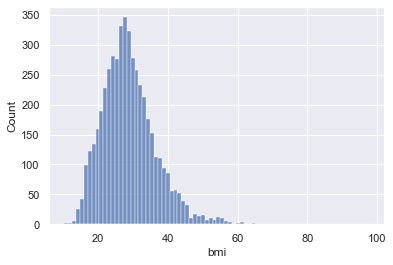

In [52]:
sns.histplot(x='bmi', data=df)

In [53]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [54]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Count'>

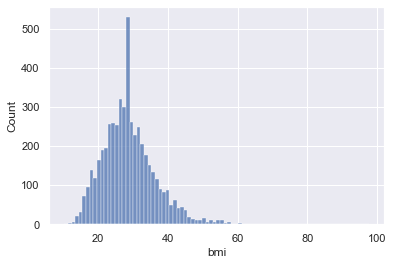

In [55]:
sns.histplot(x='bmi', data=df)

# Encoding Categorical Columns

In [56]:
categ_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

* **One Hot Encoding**

In [57]:
def encode_categ_cols_one_hot_encoding():
    dataset = df.copy()
    return pd.get_dummies(data=dataset, columns=categ_cols)

In [58]:
encode_df = encode_categ_cols_one_hot_encoding()

In [59]:
encode_df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [60]:
encode_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [61]:
grouped_df = df.groupby('stroke')['stroke'].agg({'count'}).reset_index()
grouped_df['percentage'] = grouped_df['count'].apply(lambda x: x * 100 / len(df))
grouped_df


,stroke,count,percentage
0,0,4861,95.127202
1,1,249,4.872798


* Our dataset is higly imbalanced, as it contains 95% of value as 0 and only 5% of value as 1. 
* We can use Random Undersampling, Random Oversampling and SMOTE to create a banace dataset.

### Scaling Dataset

In [62]:
from sklearn.preprocessing import StandardScaler

def scale_dataset(df):
    dataset = df.copy()
    dataset.drop(['stroke'], axis=1, inplace=True)
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)


In [63]:
scaled_X = scale_dataset(encode_df)
scaled_X.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,-1.298312,1.051434,-0.328602,4.185032,2.706375,1.001234e+00,-1.189510,1.189990,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,2.184951,-0.766774,-0.427313
1,0.716371,0.786070,-0.328602,-0.238947,2.121559,1.384666e-15,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313
2,-0.255478,1.626390,-0.328602,4.185032,-0.005028,4.685773e-01,-1.189510,1.189990,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313
3,1.118363,0.255342,-0.328602,-0.238947,1.437358,7.154182e-01,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,-0.766774,2.340204
4,-1.647136,1.582163,3.043196,-0.238947,1.501184,-6.357112e-01,0.840682,-0.840343,-0.01399,-0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313


# Feature Selection

* `round(3)` : round the 3rd value after decimal

In [64]:
corr = scaled_X.corr().round(3)
corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.000,0.004,0.004,-0.001,0.001,0.003,-0.002,0.002,0.013,-0.014,...,0.005,0.024,-0.020,-0.014,0.001,-0.001,-0.019,0.008,0.011,0.001
age,0.004,1.000,0.276,0.264,0.238,0.326,0.028,-0.028,-0.011,-0.679,...,-0.079,0.117,0.328,-0.634,-0.014,0.014,-0.378,0.237,0.119,0.073
hypertension,0.004,0.276,1.000,0.108,0.174,0.160,-0.021,0.021,-0.005,-0.164,...,-0.022,-0.005,0.115,-0.130,0.008,-0.008,-0.142,0.059,0.065,0.031
heart_disease,-0.001,0.264,0.108,1.000,0.162,0.039,-0.086,0.086,-0.003,-0.115,...,-0.016,0.000,0.087,-0.092,-0.003,0.003,-0.067,0.067,-0.022,0.044
avg_glucose_level,0.001,0.238,0.174,0.162,1.000,0.169,-0.055,0.055,0.011,-0.155,...,-0.015,0.017,0.063,-0.102,0.005,-0.005,-0.095,0.068,0.024,0.018
bmi,0.003,0.326,0.160,0.039,0.169,1.000,0.026,-0.025,-0.012,-0.336,...,-0.029,0.204,0.071,-0.443,0.000,-0.000,-0.265,0.104,0.106,0.086
gender_Female,-0.002,0.028,-0.021,-0.086,-0.055,0.026,1.000,-1.000,-0.017,-0.030,...,-0.011,0.032,0.026,-0.089,-0.006,0.006,-0.059,-0.044,0.099,-0.011
gender_Male,0.002,-0.028,0.021,0.086,0.055,-0.025,-1.000,1.000,-0.012,0.030,...,0.011,-0.033,-0.026,0.089,0.006,-0.006,0.060,0.043,-0.099,0.011
gender_Other,0.013,-0.011,-0.005,-0.003,0.011,-0.012,-0.017,-0.012,1.000,0.019,...,-0.001,0.012,-0.006,-0.006,0.014,-0.014,-0.009,0.031,-0.011,-0.006
ever_married_No,-0.014,-0.679,-0.164,-0.115,-0.155,-0.336,-0.030,0.030,0.019,1.000,...,0.091,-0.154,-0.193,0.544,0.006,-0.006,0.332,-0.171,-0.103,-0.105


<AxesSubplot:>

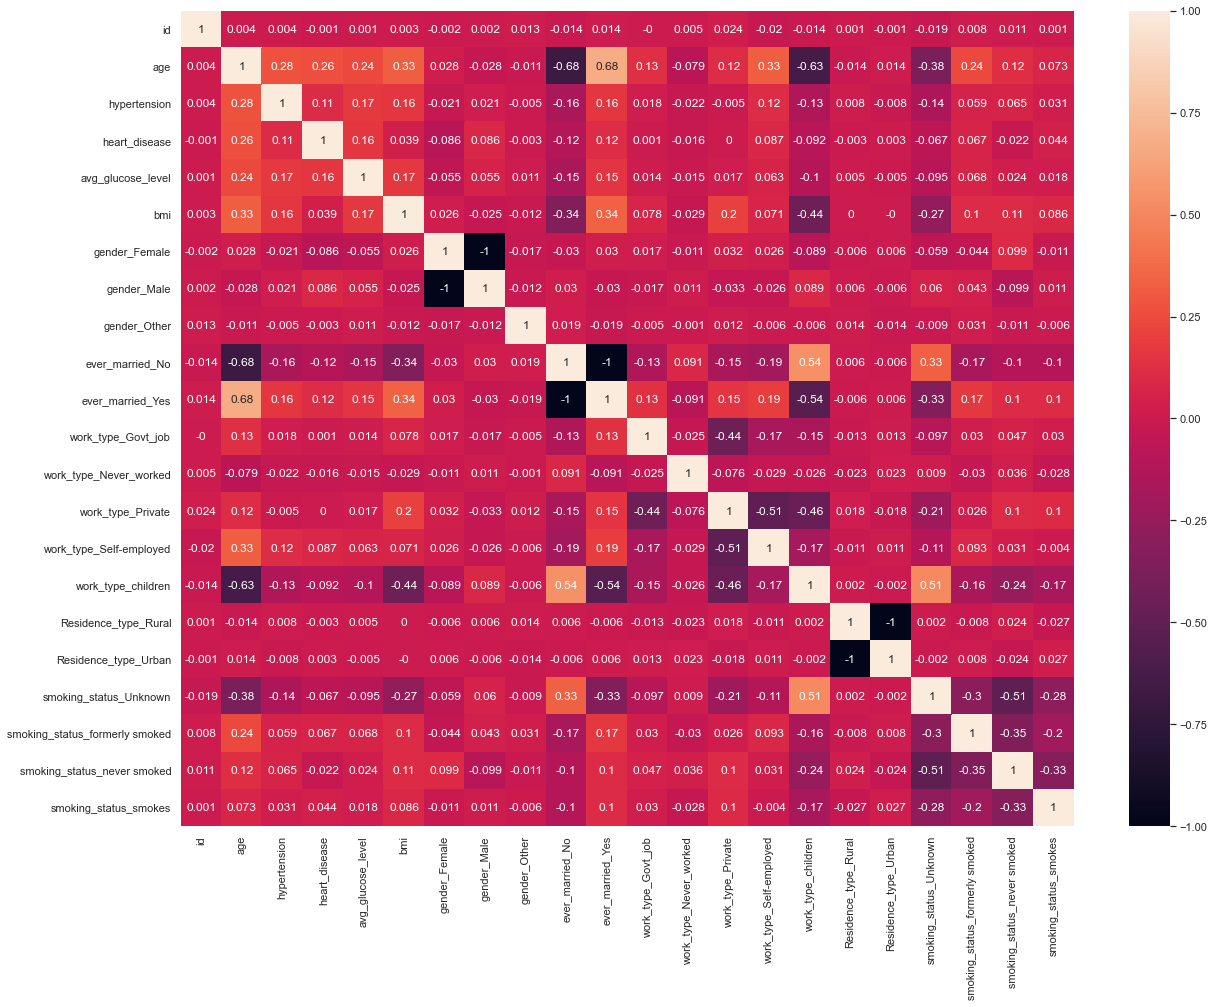

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

* There are no higly correlated columns. So, less chance of overfitting.

## Using Lasso Regression

In [66]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [67]:
scaled_X.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [68]:
scaled_X.drop('id', inplace=True, axis=1)

* Dropping unwanted feature

In [69]:
dataset = scaled_X.copy()

Y = df['stroke']
X = dataset

In [70]:
dataset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,-0.328602,4.185032,2.706375,1.001234e+00,-1.189510,1.189990,-0.01399,-0.723884,0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,2.184951,-0.766774,-0.427313
1,0.786070,-0.328602,-0.238947,2.121559,1.384666e-15,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313
2,1.626390,-0.328602,4.185032,-0.005028,4.685773e-01,-1.189510,1.189990,-0.01399,-0.723884,0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313
3,0.255342,-0.328602,-0.238947,1.437358,7.154182e-01,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-0.065756,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,-0.766774,2.340204
4,1.582163,3.043196,-0.238947,1.501184,-6.357112e-01,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-0.065756,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313


In [71]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,
                                     random_state=0))
feature_sel_model.fit(X,Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [72]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False])

In [73]:
selected_features = X.columns[(feature_sel_model.get_support())]
selected_features


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'ever_married_No', 'work_type_children'],
      dtype='object')

# Model Selction with Cross Validation

In [74]:
!pip3 install imblearn

In [76]:
! pip install imbalanced-learn

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold


In [82]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

#from imblearn import under_sampling, over_sampling

In [91]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
smt = RandomOverSampler(random_state=12)
def apply_stratified_k_fold_validation( model, x = X[selected_features], y = Y ):
    fig, axes = plt.subplots(1, 5, figsize=(36, 5))
    exp = 0
    for train_index, test_index in skf.split(x , y):
        x_train_fold, x_test_fold = x.iloc[train_index.tolist()], x.iloc[test_index.tolist()]
        y_train_fold, y_test_fold = y.iloc[train_index.tolist()], y.iloc[test_index.tolist()]
        X_train_res, y_train_res = smt.fit_resample(x_train_fold, y_train_fold)
        model.fit(X_train_res, y_train_res)
        y_pred_fold = model.predict(x_test_fold)
        print("Experiment:", exp)
        print("Classification Report")
        print(classification_report(y_test_fold, y_pred_fold))
        print("Confusion Matrix")
        mat = confusion_matrix(y_test_fold, y_pred_fold)
        print("True Postive:", mat[0][0])
        print("True Negative:", mat[1][1])
        print("False Postive:", mat[0][1])
        print("False Negative:", mat[1][0])
        print("\n")
        sns.countplot(x=y_pred_fold, ax= axes[exp])
        plt.title("Experiment "+ str(exp))
        exp += 1    

Experiment: 0
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.76      0.85       972
           1       0.14      0.78      0.24        50

    accuracy                           0.76      1022
   macro avg       0.56      0.77      0.55      1022
weighted avg       0.94      0.76      0.82      1022

Confusion Matrix
True Postive: 734
True Negative: 39
False Postive: 238
False Negative: 11


Experiment: 1
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       972
           1       0.13      0.80      0.22        50

    accuracy                           0.72      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.72      0.80      1022

Confusion Matrix
True Postive: 696
True Negative: 40
False Postive: 276
False Negative: 10


Experiment: 2
Classification Report
              precision    recall  f1-score   suppor

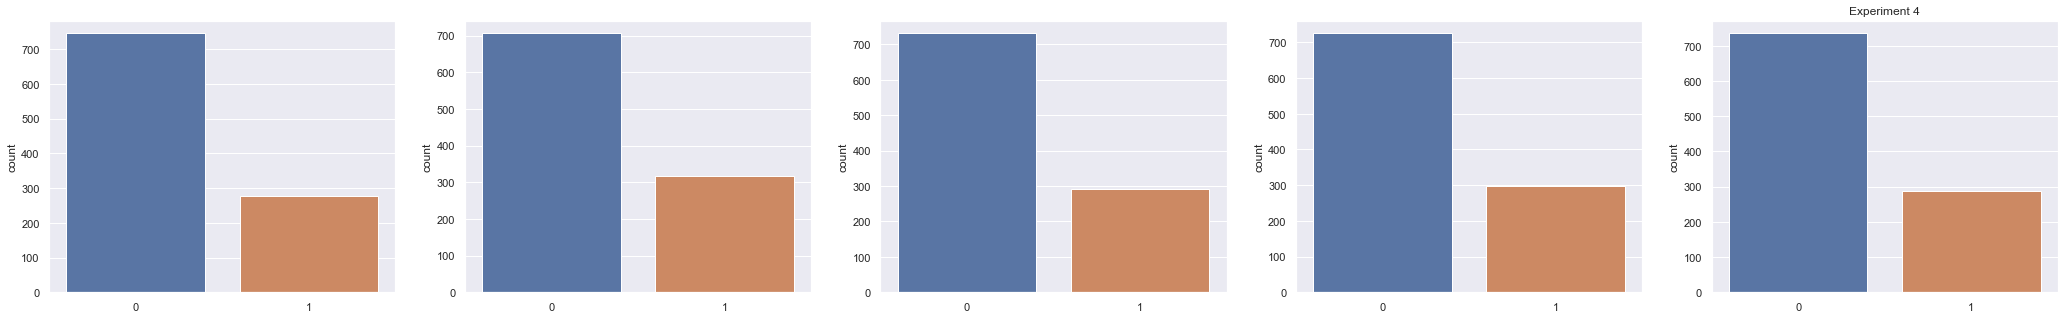

In [92]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
apply_stratified_k_fold_validation(model)
